In [1]:
import matplotlib.pyplot as plt

def draw_adjacency_matrix(matrix: list[list[bool]], iteration_number: int):
    plt.imshow(matrix, cmap="Greys", interpolation="none")
    plt.title(f"Iteration {iteration_number}")
    plt.show()

In [13]:
from autograph import autograph

def show_progression_images(
    graph: autograph.KnowledgeGraph,
    num_iterations: int,
    shuffle_seed: int,
    factor: float
):
    graph.shuffle_vertex_ids(shuffle_seed)
    draw_adjacency_matrix(graph.as_matrix(), 0)

    for i in range(num_iterations):
        weights = graph.cluster(factor)
        num_weights = len(weights)
        draw_adjacency_matrix(graph.as_matrix(), i + 1)

        plt.plot(weights)
        plt.title(f"Iteration {i + 1} weights")
        plt.show()

        derivative = [b - a for a, b in zip(weights, weights[1:])]
        plt.plot(derivative)
        plt.title(f"Iteration {i + 1} gradient")
        plt.show()

        laplacian = [b - a for a, b in zip(derivative, derivative[1:])]
        plt.plot(laplacian)
        plt.title(f"Iteration {i + 1} Laplacian")
        plt.show()

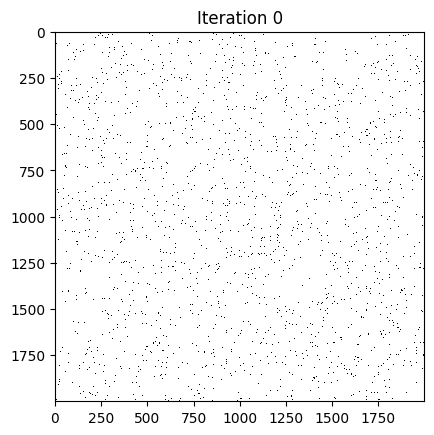

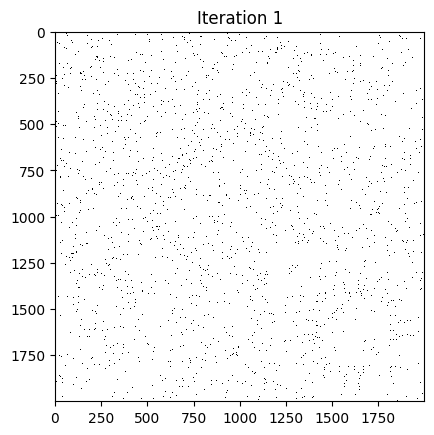

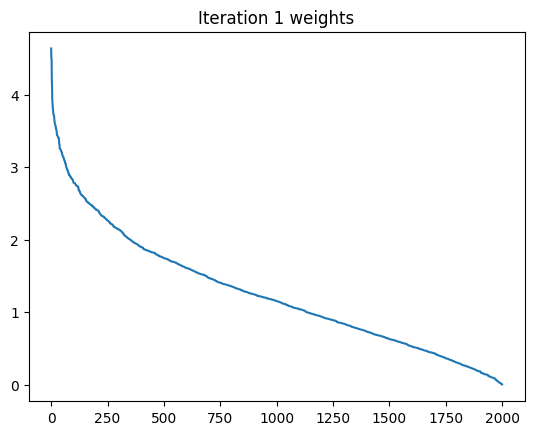

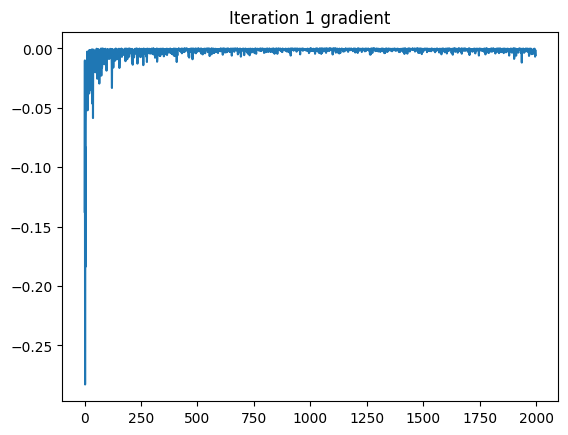

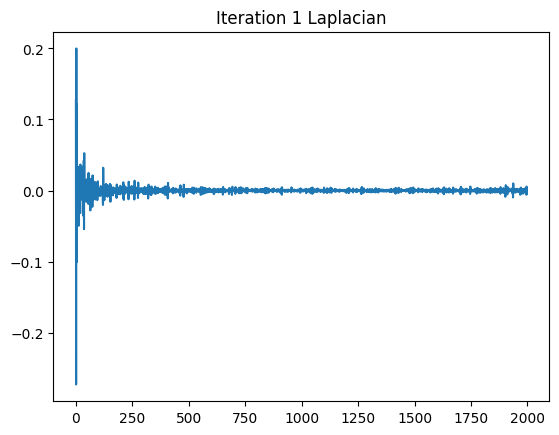

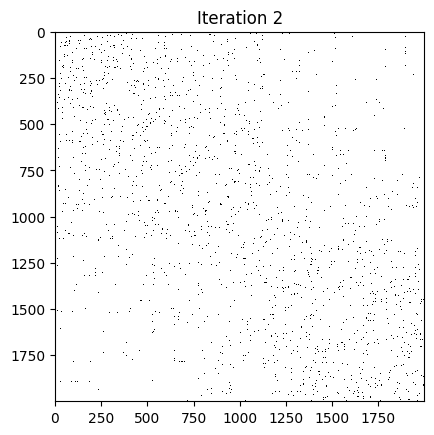

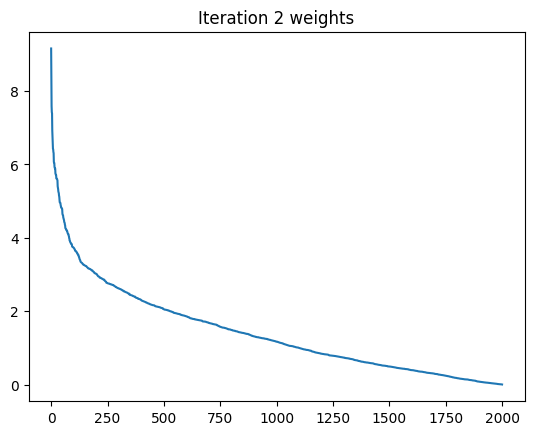

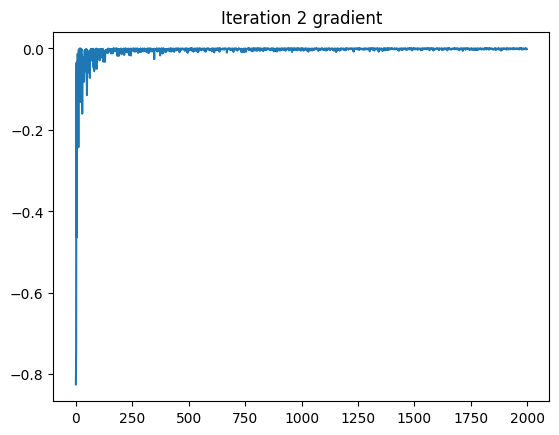

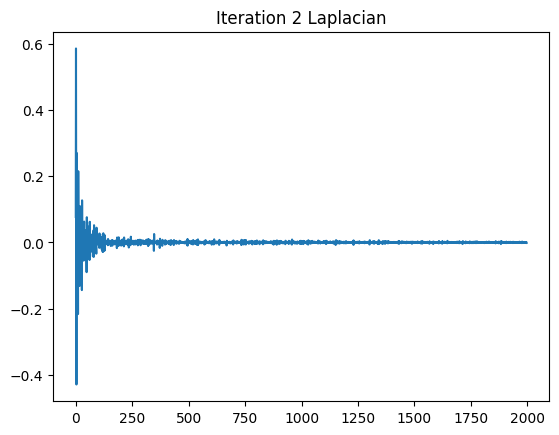

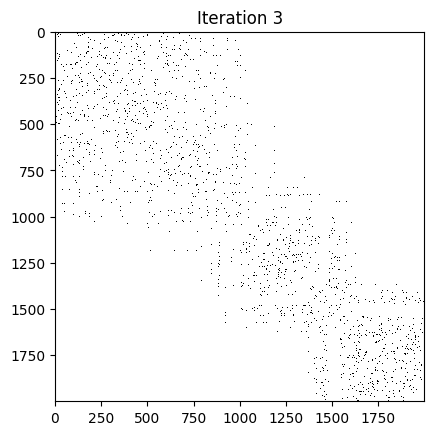

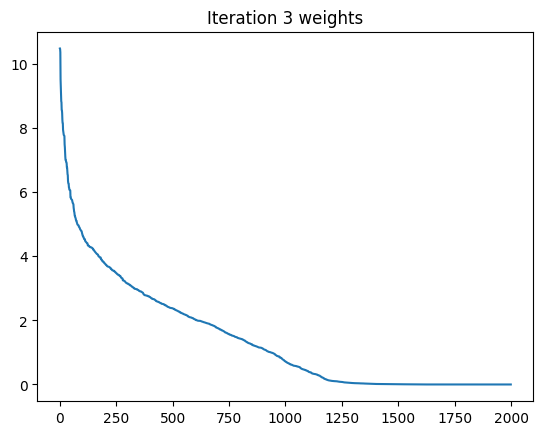

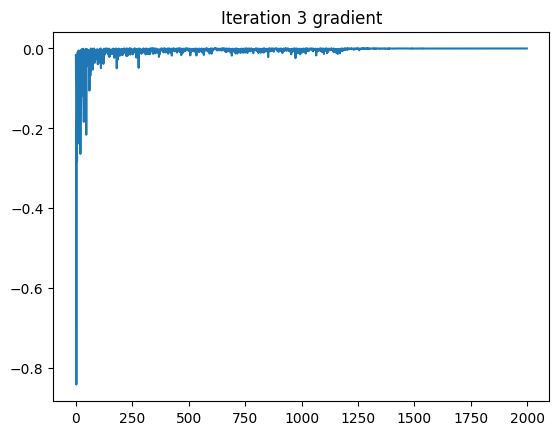

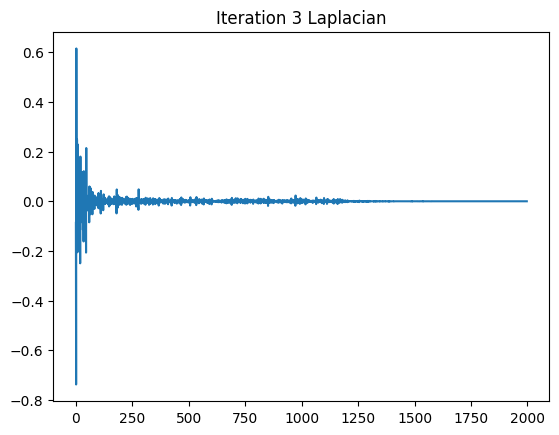

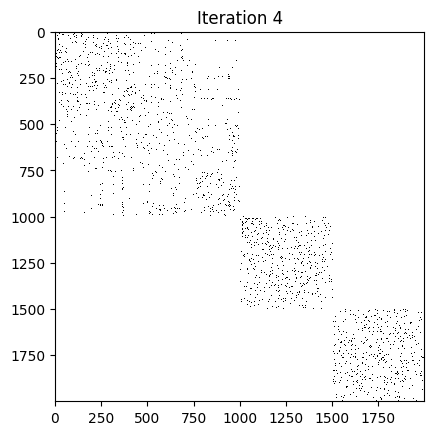

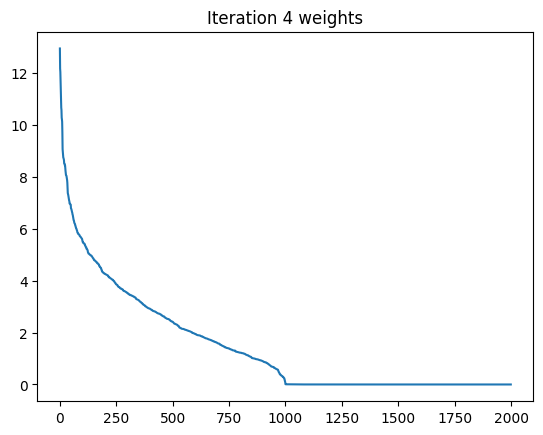

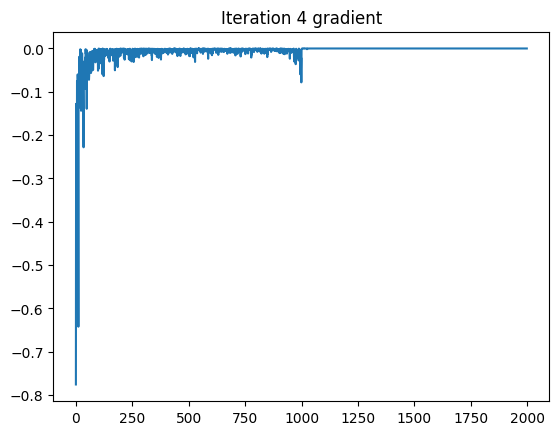

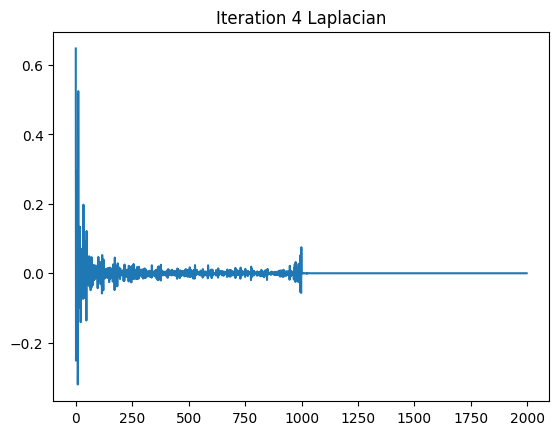

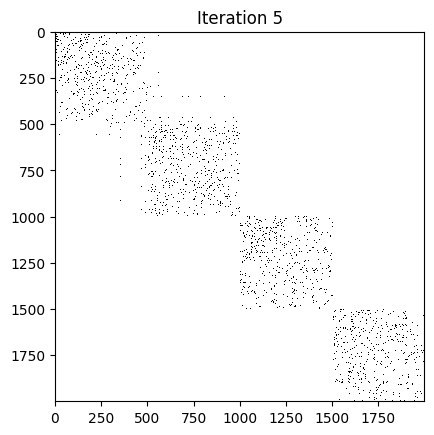

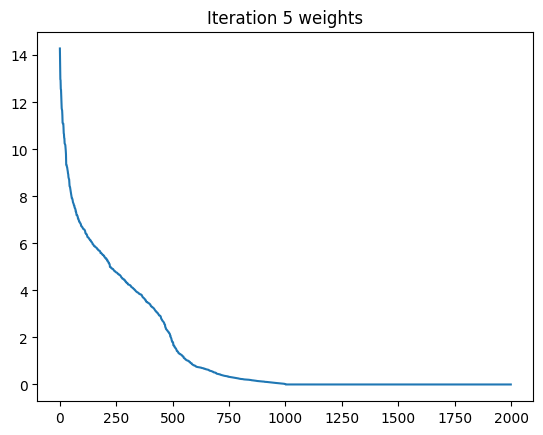

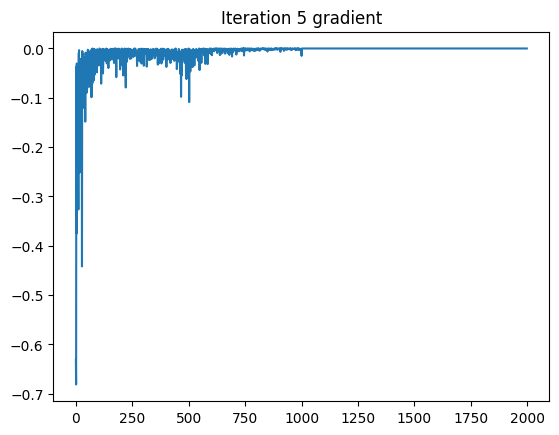

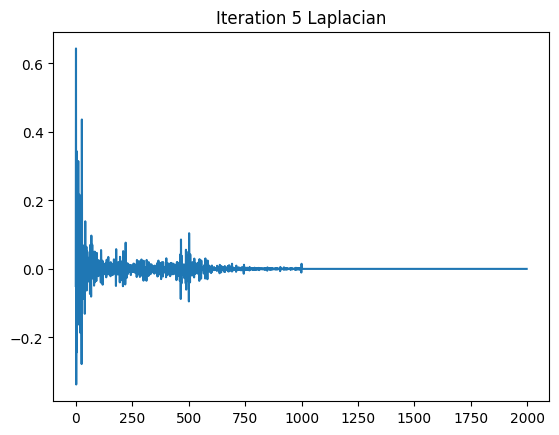

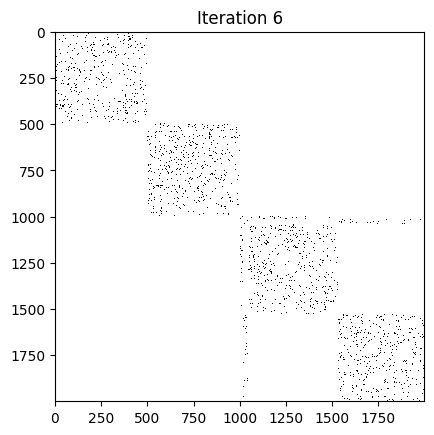

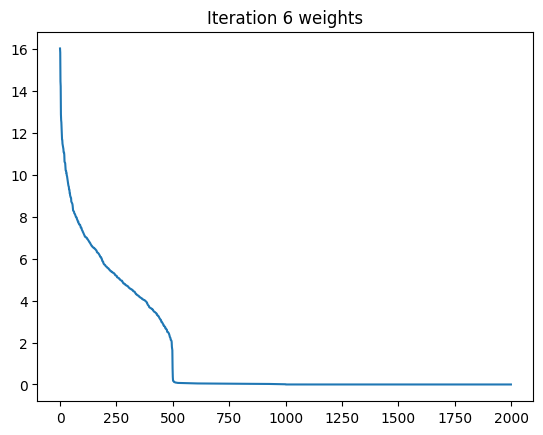

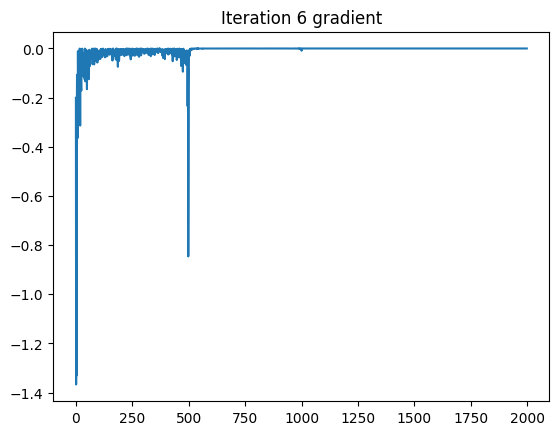

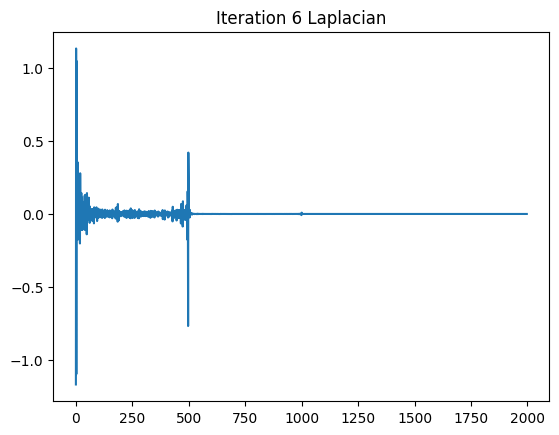

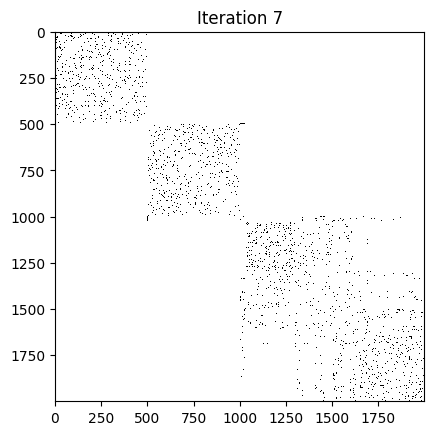

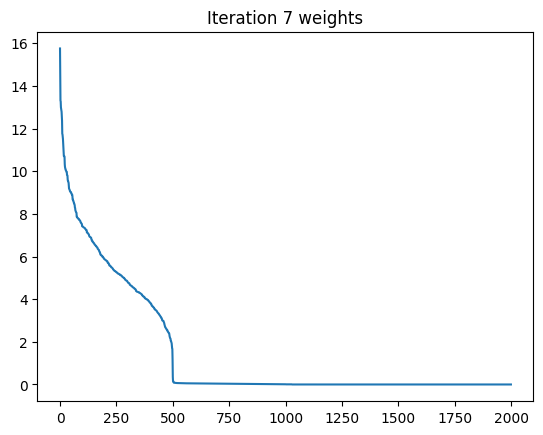

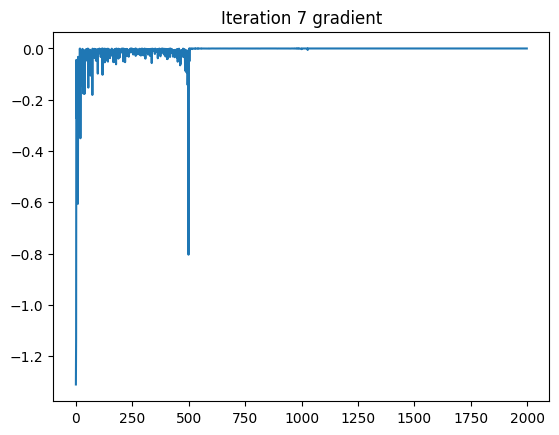

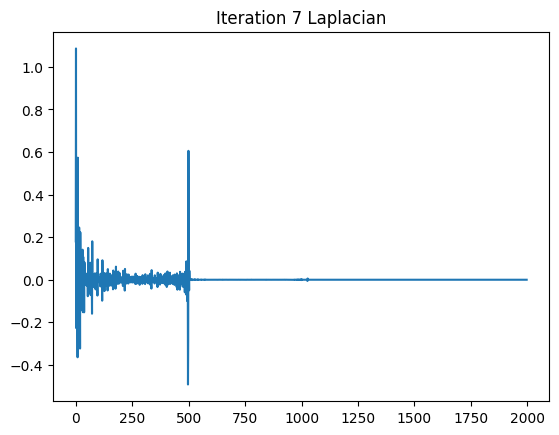

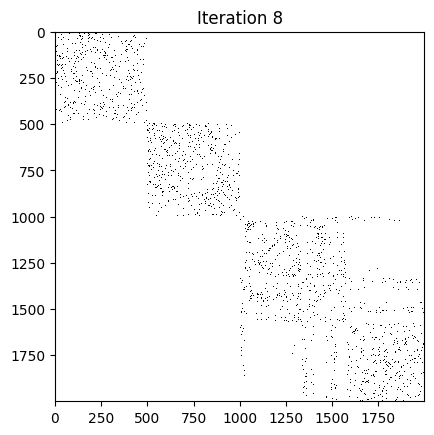

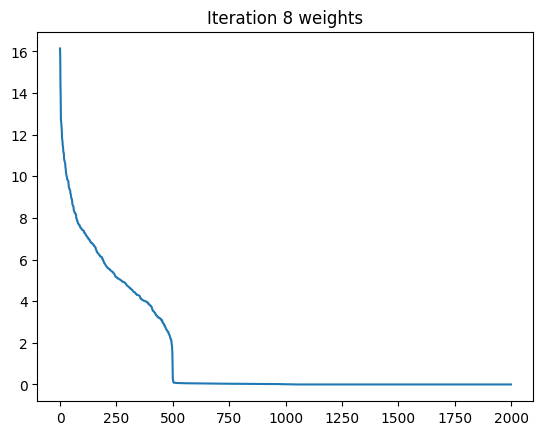

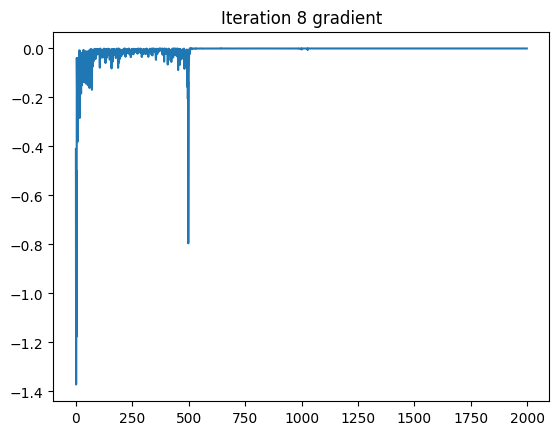

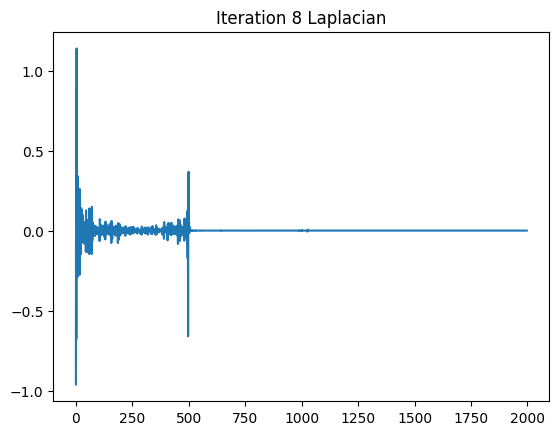

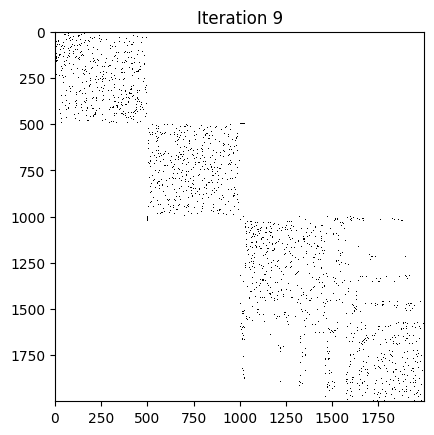

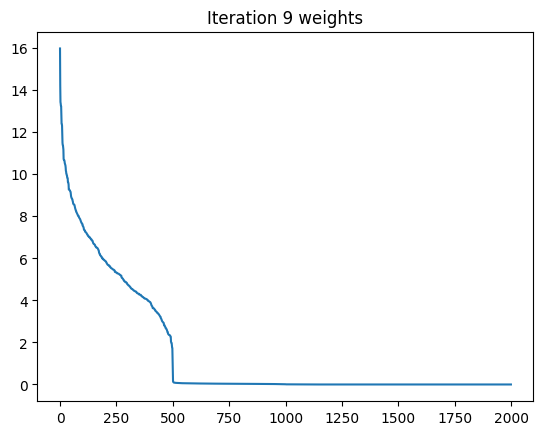

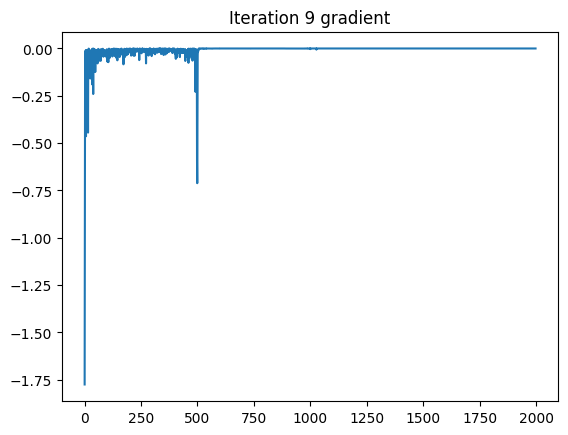

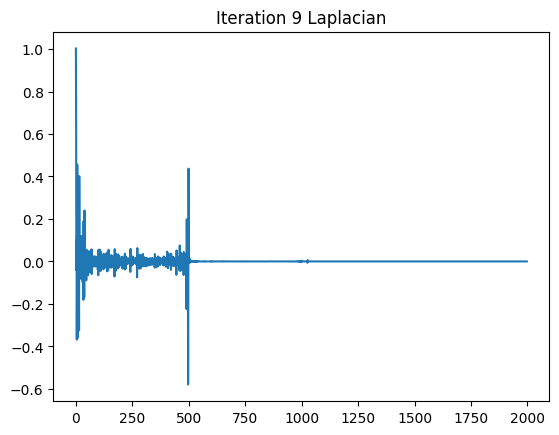

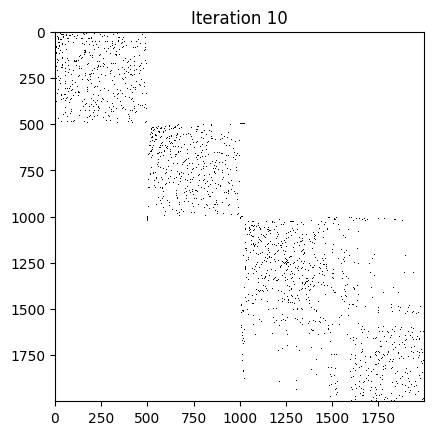

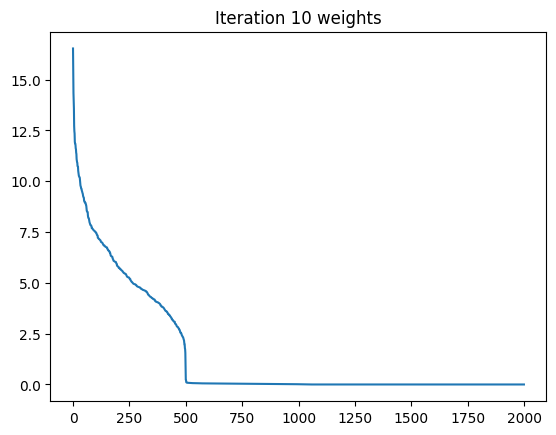

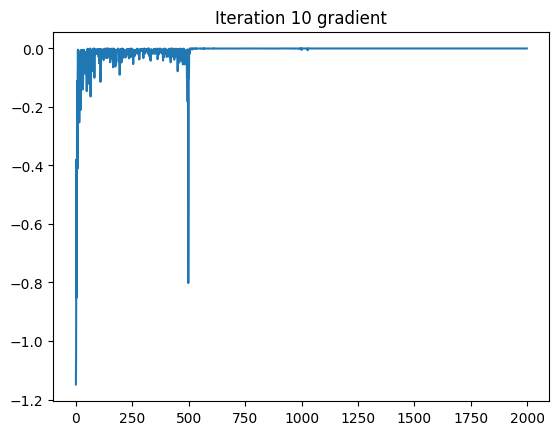

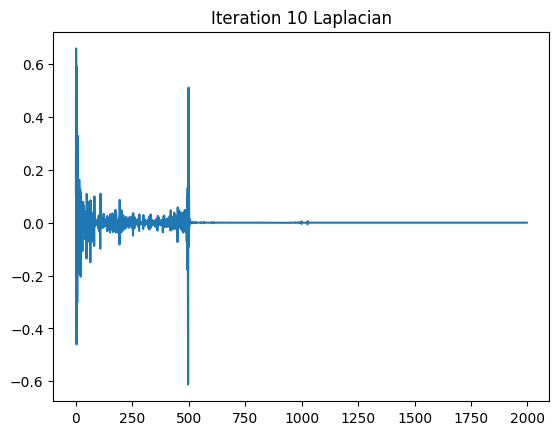

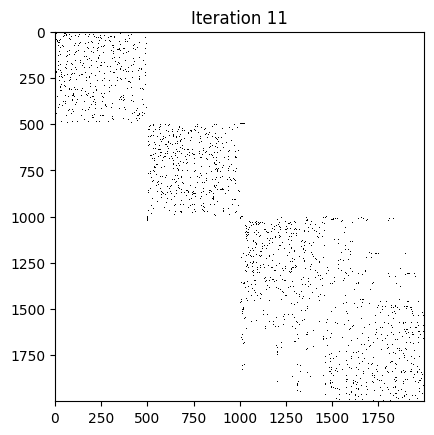

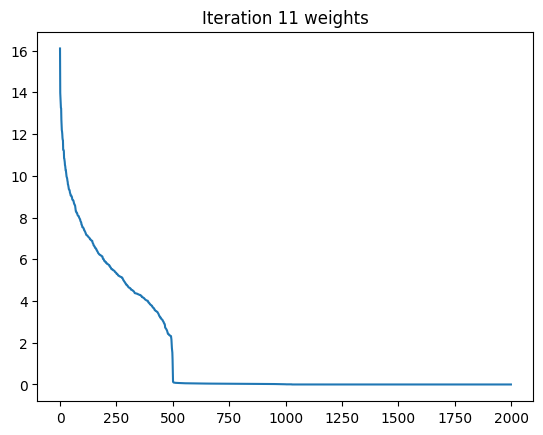

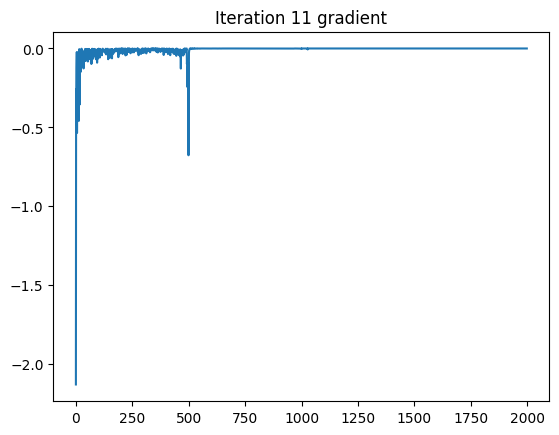

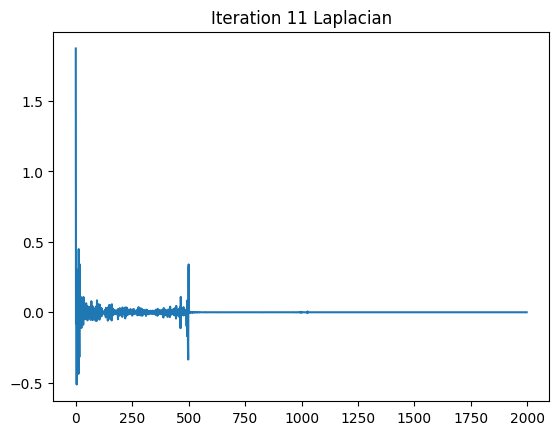

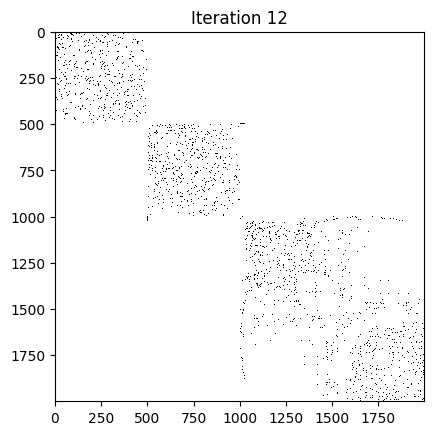

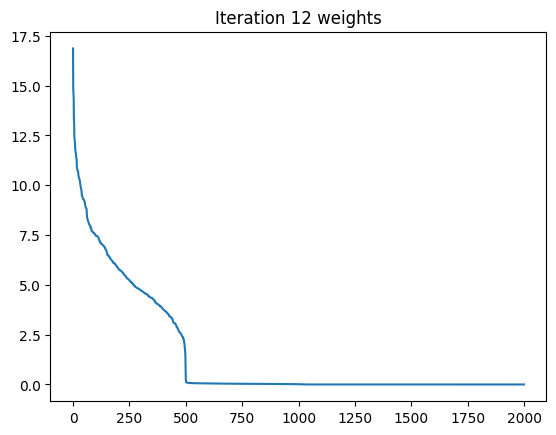

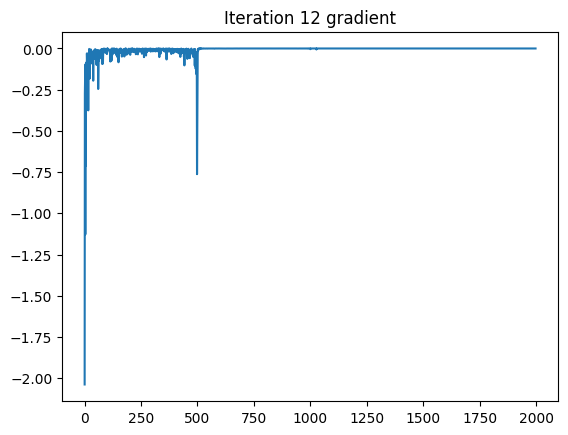

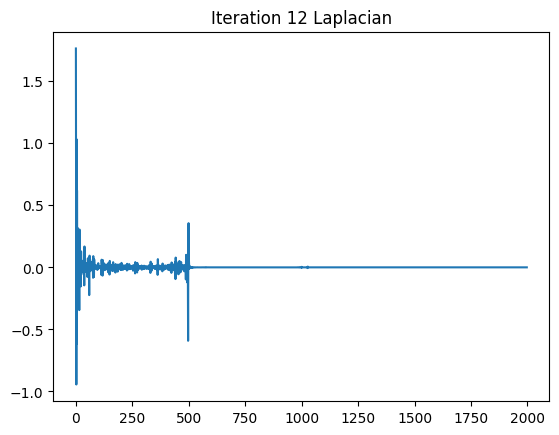

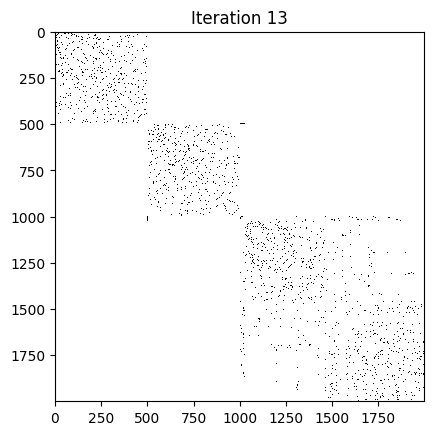

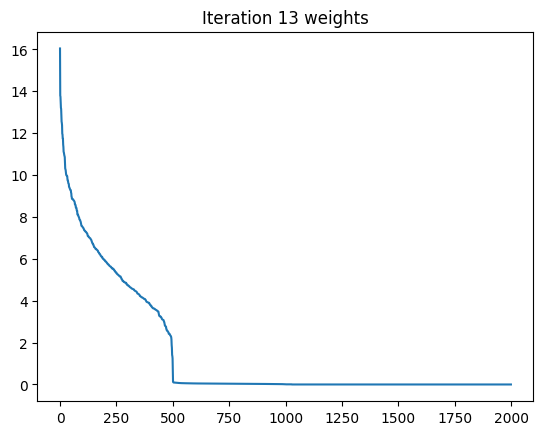

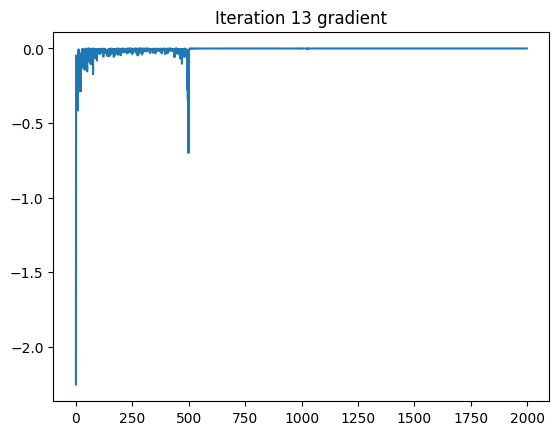

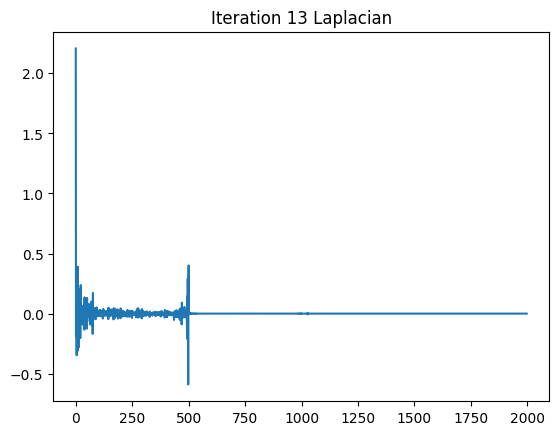

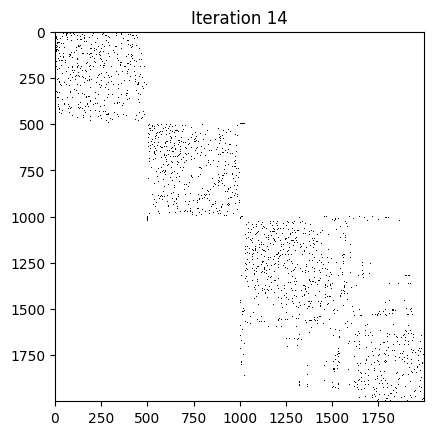

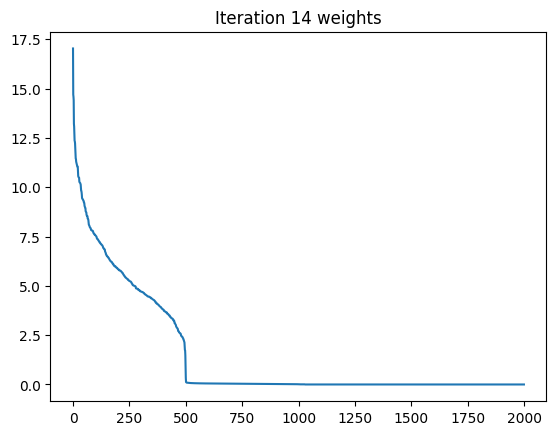

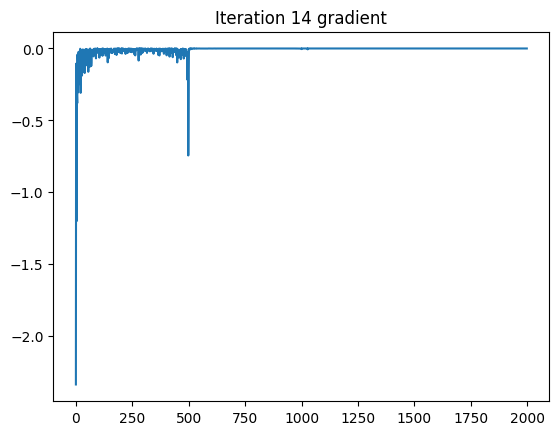

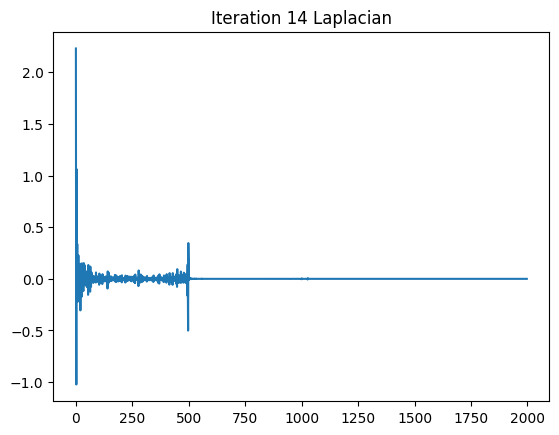

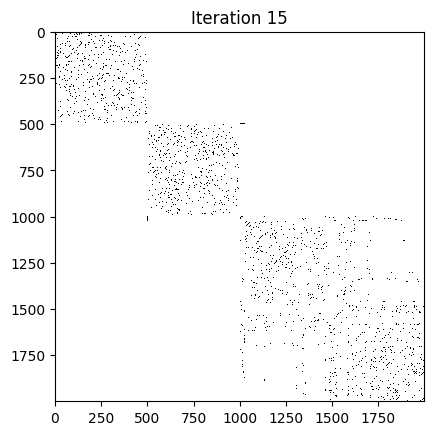

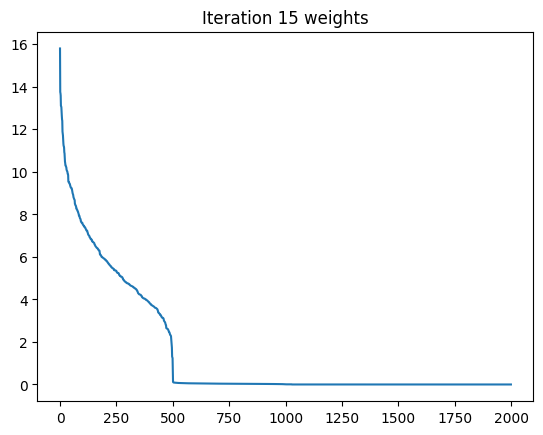

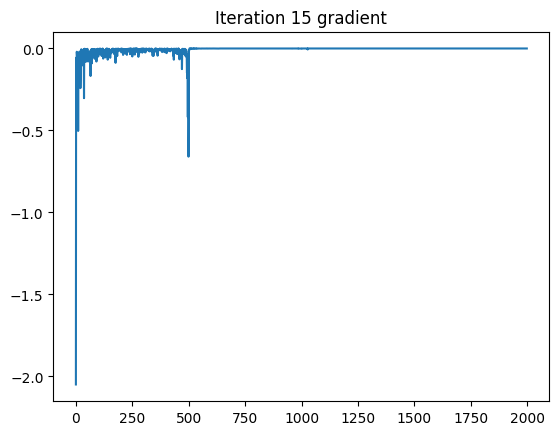

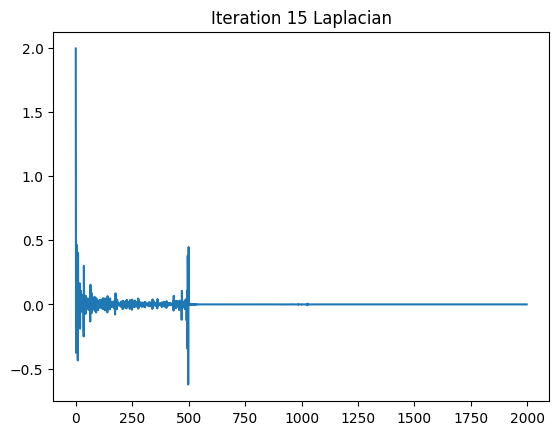

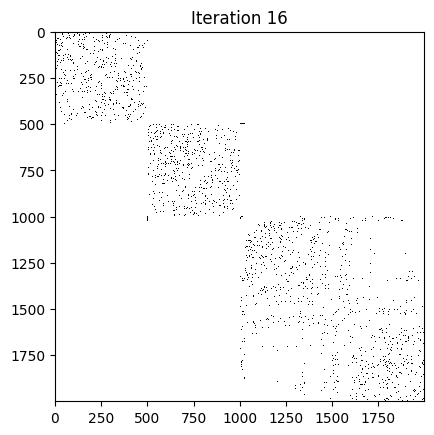

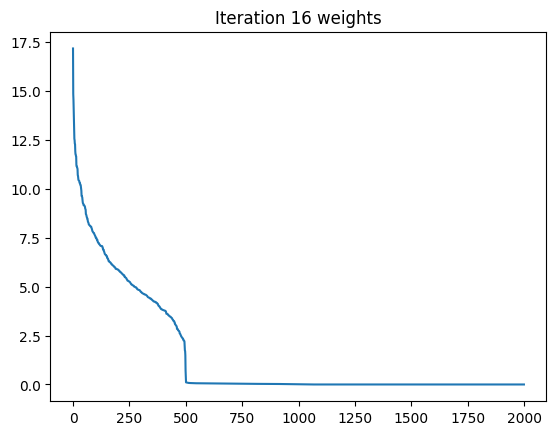

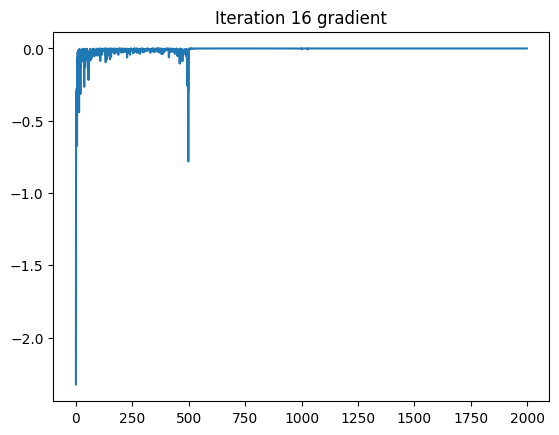

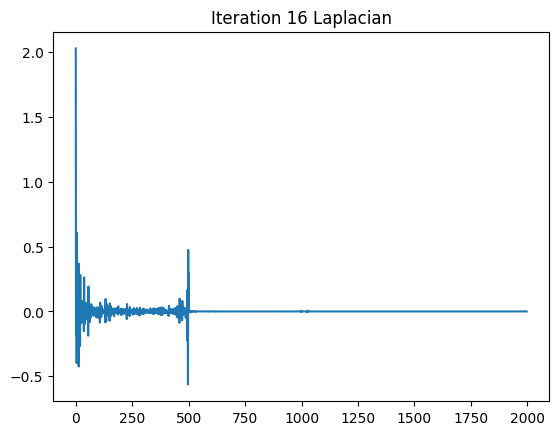

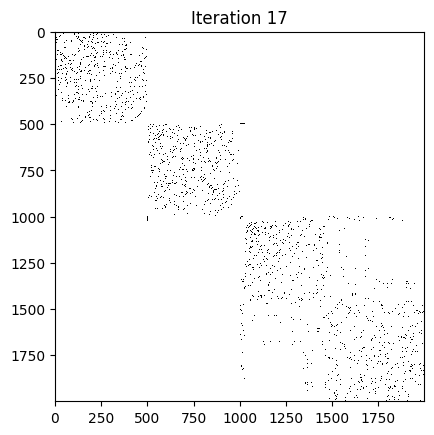

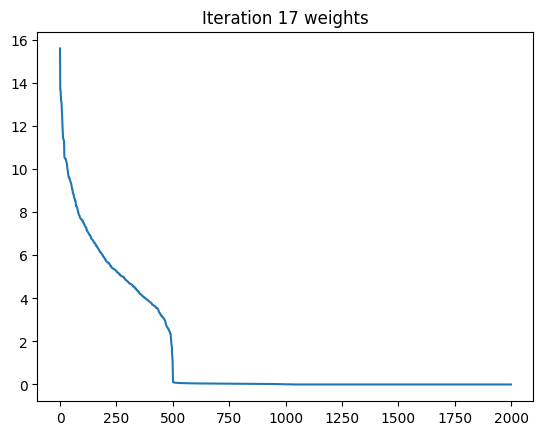

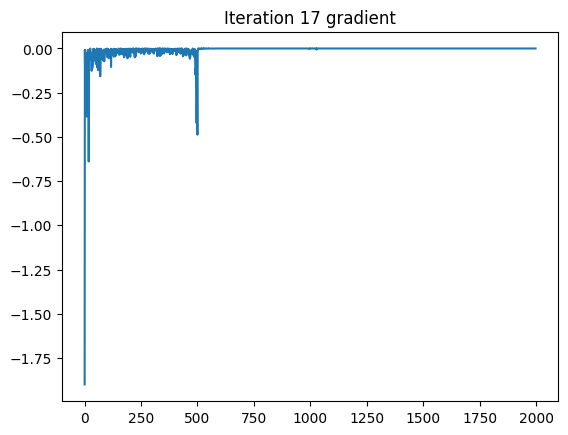

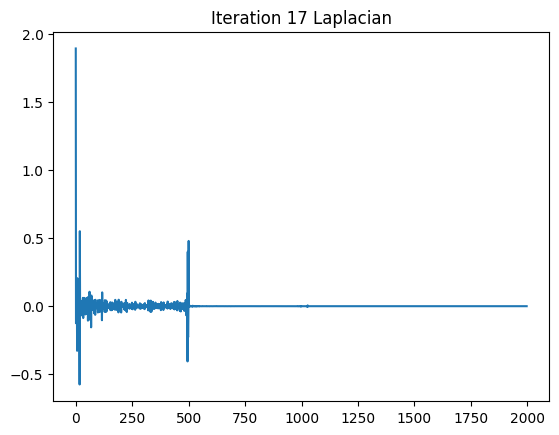

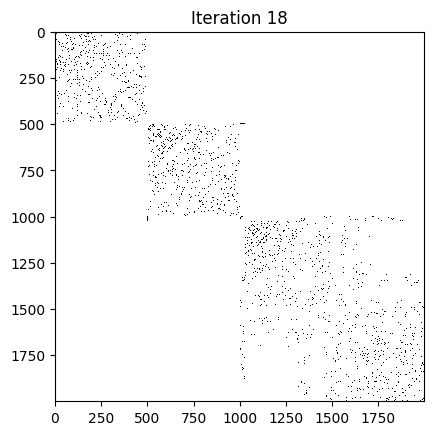

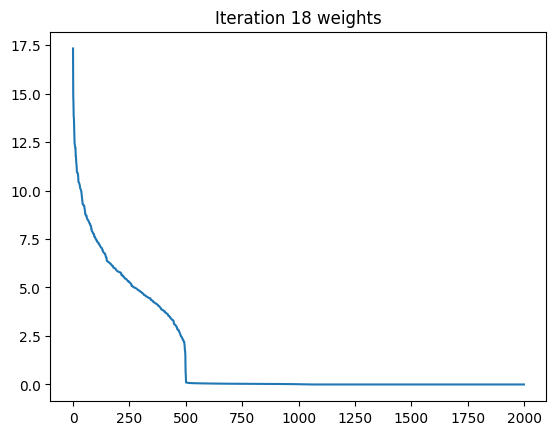

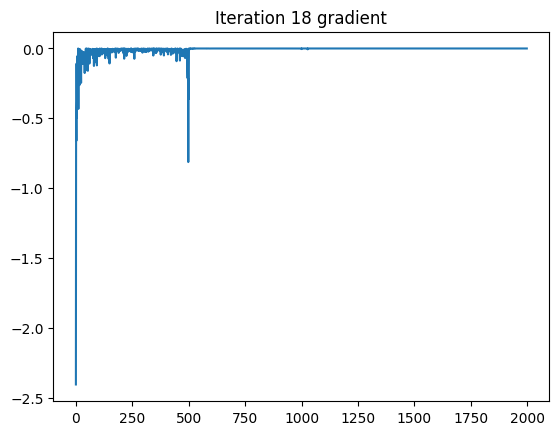

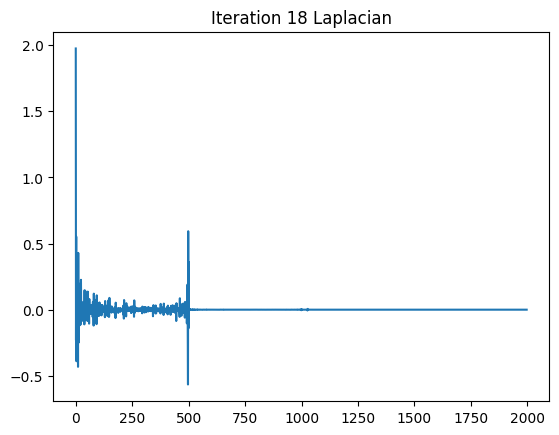

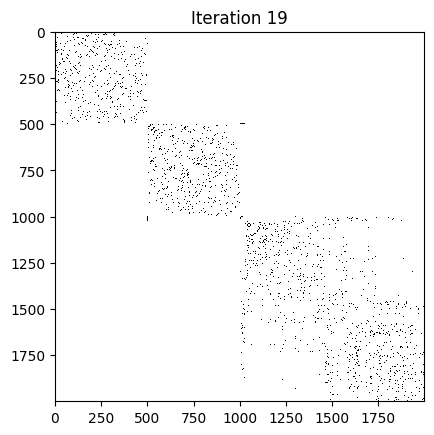

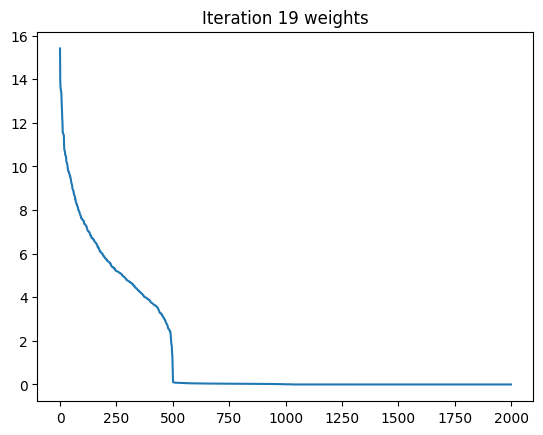

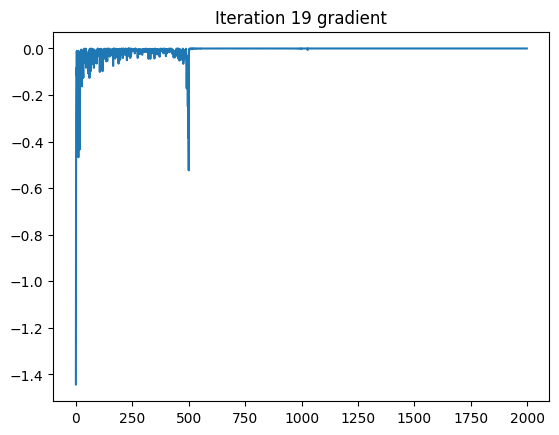

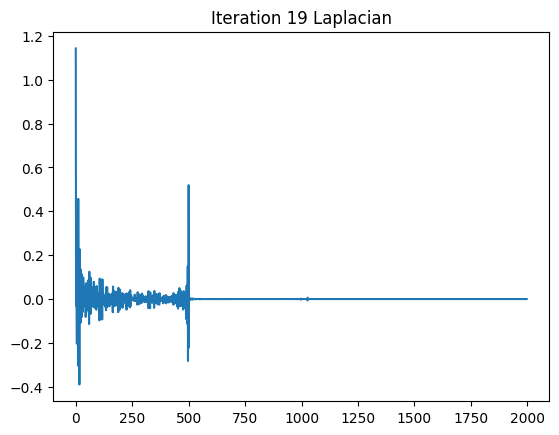

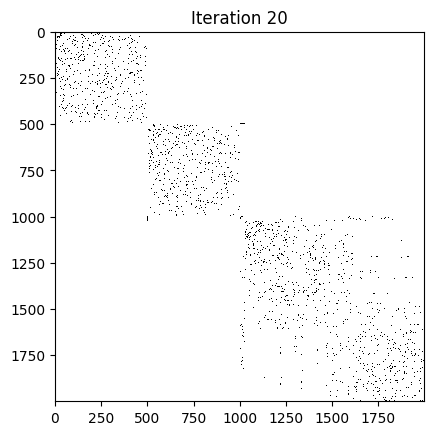

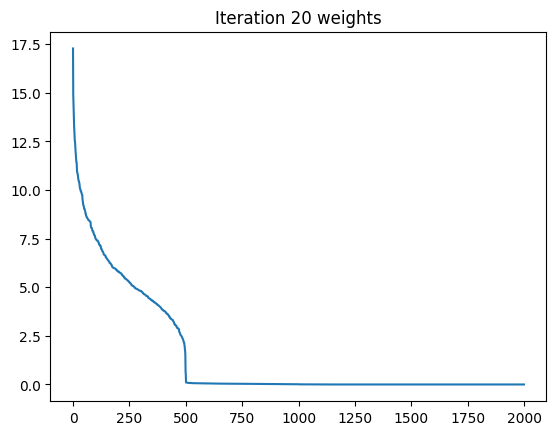

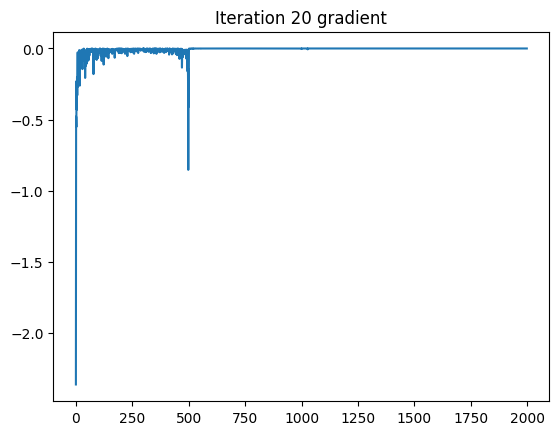

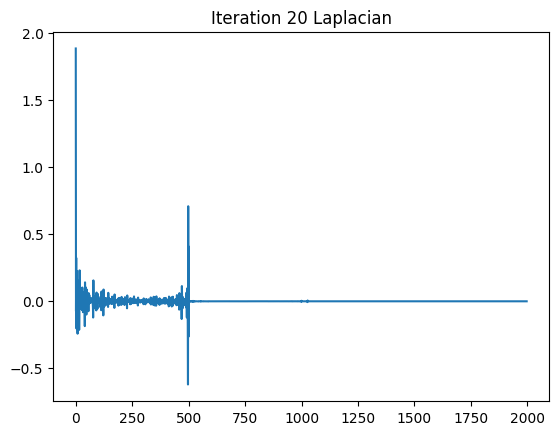

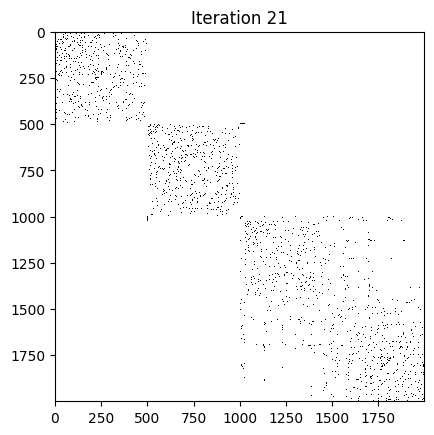

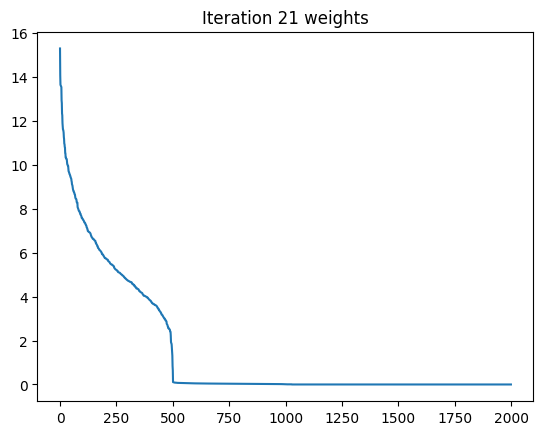

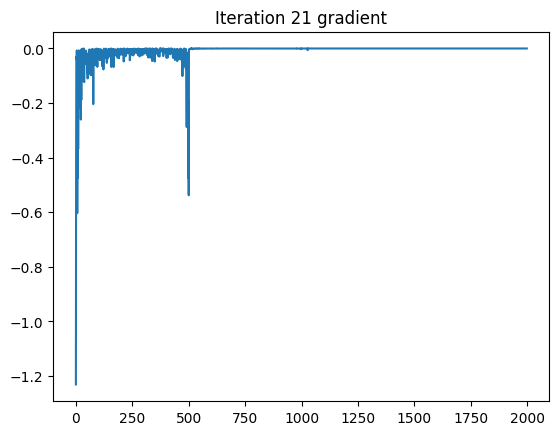

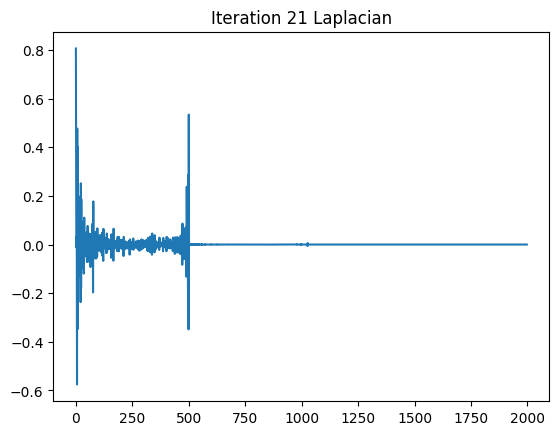

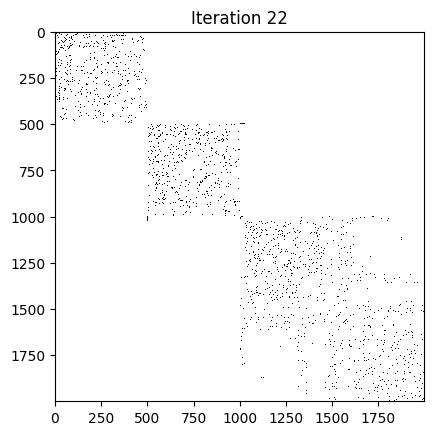

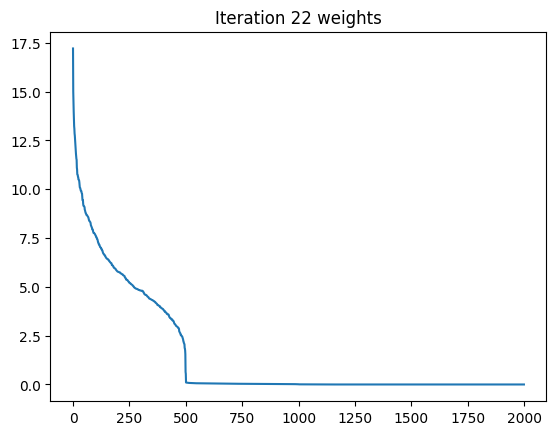

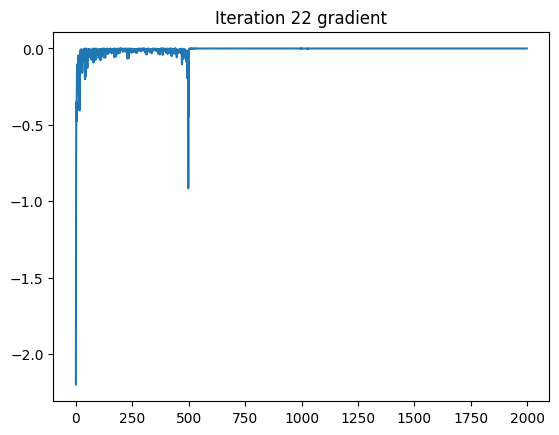

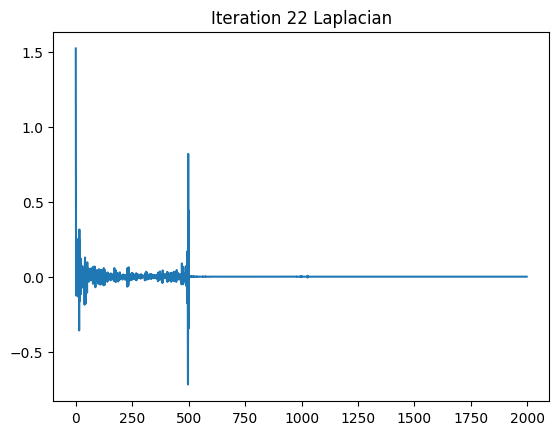

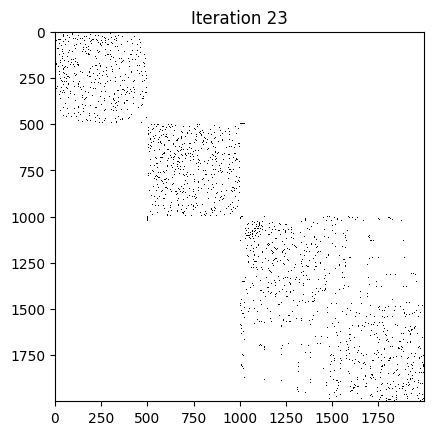

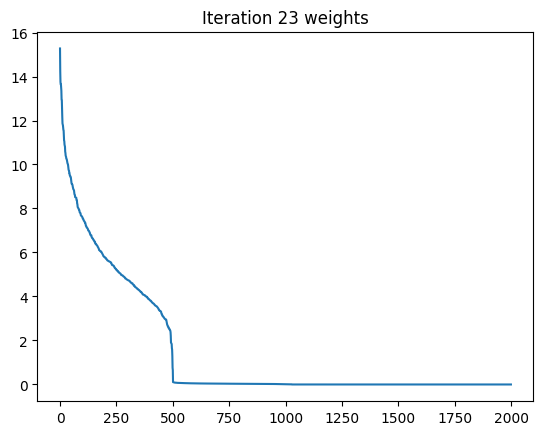

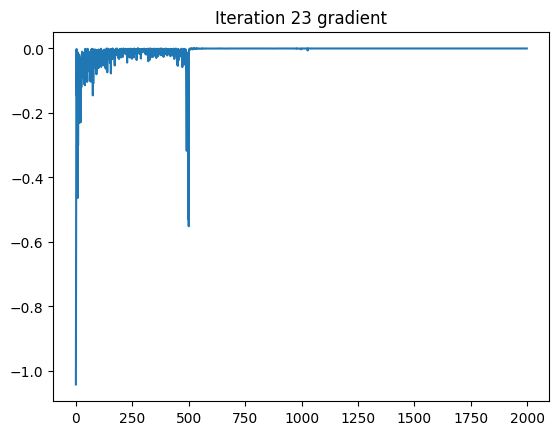

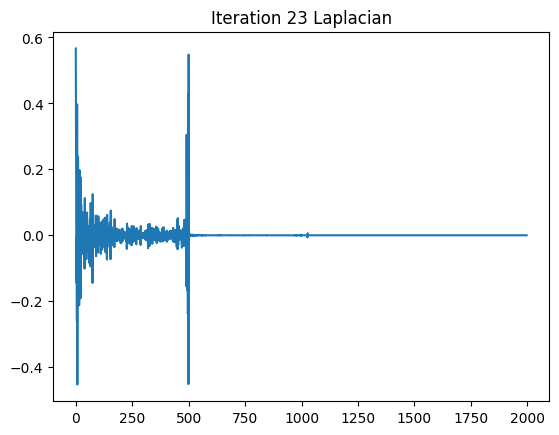

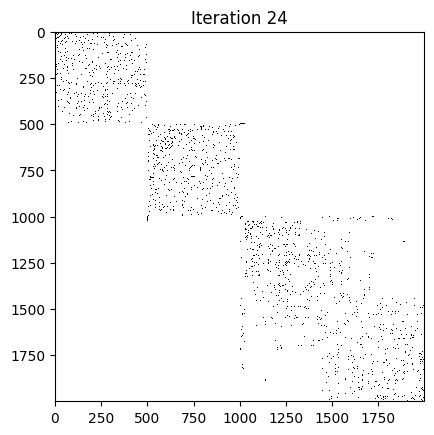

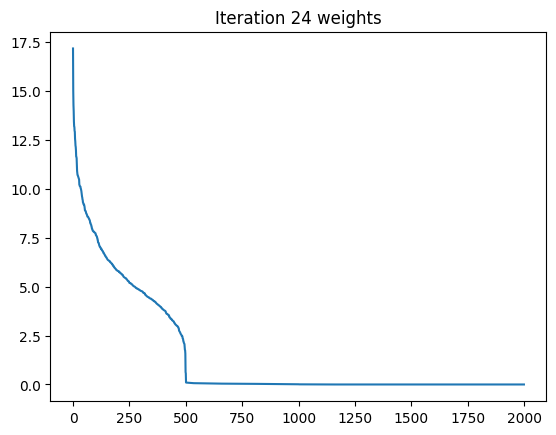

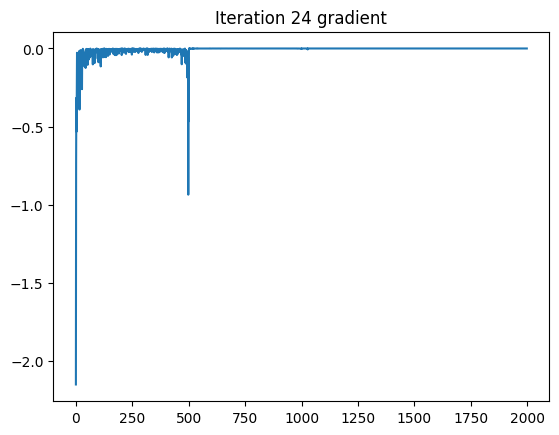

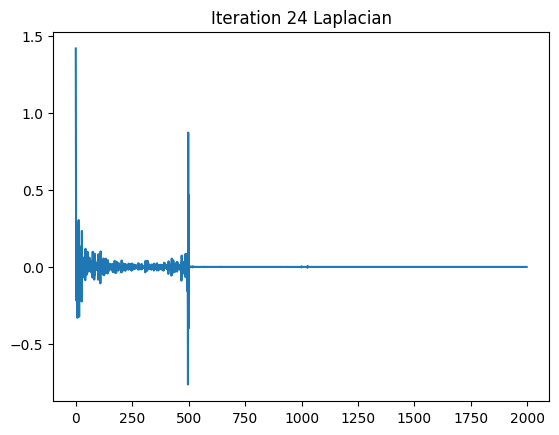

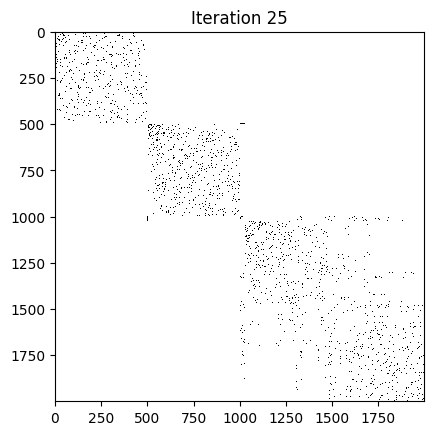

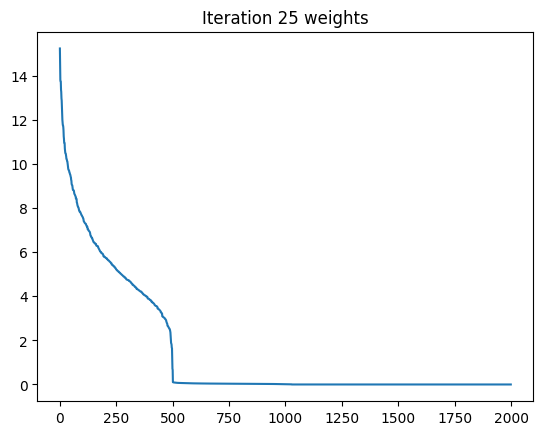

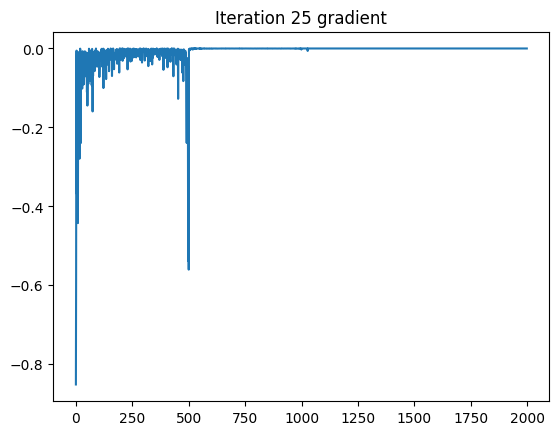

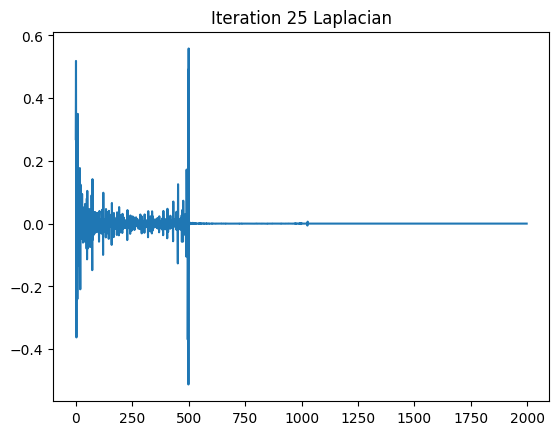

In [14]:
builder = autograph.GraphBuilder(0)
builder.add_dense_cluster(500, 0.05)
builder.add_dense_cluster(500, 0.05)
builder.add_dense_cluster(500, 0.05)
builder.add_dense_cluster(500, 0.05)
builder.add_random_link(0, 1)
builder.add_random_link(1, 2)
builder.add_random_link(2, 3)
graph = builder.finalize_graph()

show_progression_images(graph, 25, 0, 0.01)